In [94]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Import library modeling
import pycaret

import warnings
warnings.filterwarnings('ignore')

In [95]:
import pandas as pd

# Ganti path dengan lokasi sesuai dengan sistem file Anda
path = 'bank-additional-full.csv'

# Memuat dataset
data = pd.read_csv(path, sep=';')

# Menampilkan beberapa baris pertama dari dataset
display(data.head(),data.tail())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [96]:
listItem = []
for col in data.columns :
 
    listItem.append( [col, data[col].nunique(), data[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
pd.set_option('max_colwidth', None)
unique_values

,Column Name,Number of Unique,Unique Sample
0,age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,4,"[married, single, divorced, unknown]"
3,education,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,3,"[no, unknown, yes]"
5,housing,3,"[no, yes, unknown]"
6,loan,3,"[no, yes, unknown]"
7,contact,2,"[telephone, cellular]"
8,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,5,"[mon, tue, wed, thu, fri]"


### `Data Preparation`

In [97]:
data_model = data.copy()
data_model.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# **Dari Sini**

## **Data Preprocessing for Machine Learning**

### **Analisis Missing Value**

In [98]:
# Cek Missing Value
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Berdasarkan informasi yang didapatkan pada dataset, didapatkan bahwa semua missing value pada dataset diganti dengan suatu data dengan nilai 'unknown'. Untuk, dapat melihat distribusi pada nilai 'unknown' maka semua data unknown akan diubah menajadi np.nan kemudian dilihat distribusi datanya.

In [99]:
# Mengubah semua nilai 'unknown' menjadi np.nan
for i in data.columns :
    data[i] = np.where(data[i]=='unknown', np.nan, data[i])

<Axes: >

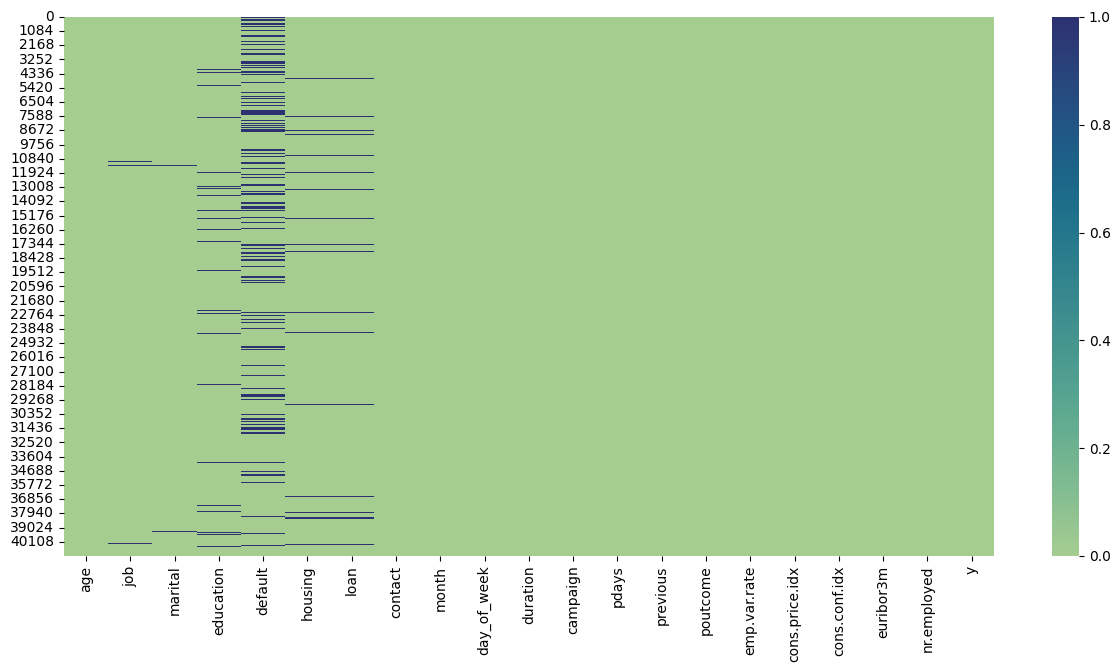

In [100]:
# Sebaran missing value di dalam data
plt.figure(figsize=(15,7))
sns.heatmap(data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']].isna(), cmap="crest")

In [101]:
# Cek Missing Value
data.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Pada proses selanjutnya kita akan handing missing value yang bernilai `unknown`

In [102]:
# Mengisi missing Value dengan data 'unknown'
data=data.fillna('unknown')

##### **Handling `unknown` in `job`**

In [103]:
# Grouping kategori kolom job
def grouping(x):
    if x == 'admin.':
        return 'Employee'
    elif x == 'blue-collar':
        return 'Employee'
    elif x == 'entrepreneur':
        return 'Entrepreneur'
    elif x == 'housemaid':
        return 'Employee'
    elif x == 'management':
        return 'Employee'
    elif x == 'retired':
        return 'Other'
    elif x == 'self-employed':
        return 'Entrepreneur'
    elif x == 'services':
        return 'Employee'
    elif x == 'student':
        return 'Other'
    elif x == 'technician':
        return 'Employee'
    elif x == 'unemployed':
        return 'Unemployed'
    else:
        return 'Other'

data['job'] = data['job'].apply(lambda x: grouping(x))

In [104]:
# Menghitung kategori di setiap kolom job
data.job.value_counts()

Employee        34372
Other            2925
Entrepreneur     2877
Unemployed       1014
Name: job, dtype: int64

Pada kolom `job` kita kelompokkan menjadi 4 kategori pekerjaan. Yaitu `admin`, `blue-collar`, `housemaid`, `management`, `services`, `technician` dikelompokkan menjadi kategori `Employee`. Selanjutnya `entrepreneur`, `self-employed` dikelompokkan menjadi kategori `Entrepreneur`. Selanjutnya `retired`, `unknown` dikelompokkan menjadi kategori `Other`, dan `unemployed` tetap menjadi kategori `Unemployed`. Pengelompokan ini berdasarkan domain knowledge, dan [informasi](https://simpedak.blitarkota.go.id/buku_data/jenis_pekerjaan) yang kita dapat.

##### **Handling `unknown` in `marital`**

In [105]:
# Menghitung kategori di setiap kolom marital
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [106]:
# Menghapus nilai unknown pada kolom marital
data = data[data['marital'] != 'unknown']

In [107]:
# Menghitung kategori di setiap kolom marital
data.marital.value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

Nilai `unknown` pada kolom `marital` di hapus karena presentasenya yang sedikit.

##### **Handling `unknown` in `education`**

In [108]:
# Menghitung kategori di setiap kolom education
data.education.value_counts()

university.degree      12137
high.school             9501
basic.9y                6037
professional.course     5237
basic.4y                4170
basic.6y                2286
unknown                 1722
illiterate                18
Name: education, dtype: int64

In [109]:
# Grouping kategori kolom education
def grouping(x):
    if x == 'basic.4y':
        return 'Primary Education'
    elif x == 'basic.6y':
        return 'Primary Education'
    elif x == 'basic.9y':
        return 'Primary Education'
    elif x == 'high.school':
        return 'Secondary Education'
    elif x == 'illiterate':
        return 'Other'
    elif x == 'professional.course':
        return 'Secondary Education'
    elif x == 'university.degree':
        return 'Higher Education'
    else:
        return 'Other'

data['education'] = data['education'].apply(lambda x: grouping(x))

In [110]:
# Menghitung kategori di setiap kolom education
data.education.value_counts()

Secondary Education    14738
Primary Education      12493
Higher Education       12137
Other                   1740
Name: education, dtype: int64

Pada kolom `education` kita kelompokkan menjadi 4 kategori. Yaitu `basic.4y`, `basic.6y`, `basic.9y` dikelompokkan menjadi kategori `Primary Education`. Selanjutnya `high.school`, `professional.course` dikelompokkan menjadi kategori `Secondary Education`. Selanjutnya `illiterate`, `unknown` dikelompokkan menjadi kategori `Other`, dan `university.degree` menjadi kategori `Higher Education`. Pengelompokan ini mengacu pada informasi [expatica.com](https://www.expatica.com/pt/education/children-education/the-education-system-in-portugal-105195/).

##### **Handling `unknown` in `default`**

In [111]:
# Menghitung kategori di setiap kolom default
data.default.value_counts()

no         32519
unknown     8586
yes            3
Name: default, dtype: int64

In [112]:
# Menghapus nilai yes pada kolom default
data = data[data['default'] != 'yes']

In [113]:
# Merubah nilai unknown menjadi kategori no
def grouping(x):
    if x == 'no':
        return 'no'
    else:
        return 'no'

data['default'] = data['default'].apply(lambda x: grouping(x))

In [114]:
# Menghitung kategori di setiap kolom default
data.default.value_counts()

no    41105
Name: default, dtype: int64

Pada kolom `default` kita menghapus nilai `yes` karena jumalah datanya hanya 3 dan dari ketiganya tidak ada yang berlangganan deposito. Selanjutnya kita mengelompokkan nilai `unknown` menjadi nilai `no`, dengan asumsi semua calon nasabah tidak ada yang gagal bayar kredit, hal ini tentu akan menjadi `limitasi untuk model` yang nantinya dibangun. Dengan semua nilainya menjadi `no` maka selanjutnya kolom `default` tidak digunakan sebagai fitur pada pemodelan machine learning. Selanjutnya bila di kemudian hari terdapat pelanggan yang mengalami kredit macet akan diprioritaskan untuk menulasi terlebih dahulu, dan tidak diprioritaskan untuk calon nasabah program term deposit. Hal ini akan di jelaskan lebih lanjut di `limitasi model`.

##### **Handling `unknown` in `housing`**

In [115]:
# Menghitung kategori di setiap kolom housing
data.housing.value_counts()

yes        21540
no         18576
unknown      989
Name: housing, dtype: int64

In [116]:
# Menghapus nilai unknown pada kolom housing
data = data[data['housing'] != 'unknown']

In [117]:
# Menghitung kategori di setiap kolom housing
data.housing.value_counts()

yes    21540
no     18576
Name: housing, dtype: int64

Nilai `unknown` pada kolom `housing` di hapus karena jumlahnya yang sedikit.

##### **Handling `unknown` in `loan`**

In [118]:
# Menghitung kategori di setiap kolom loan
data.loan.value_counts()

no     33880
yes     6236
Name: loan, dtype: int64

Nilai `unknown` pada kolom `loan` sudah ikut terhapus karena nilai `unknown` pada kolom `loan` berkaitan atau memiliki pola yang sama dengan nilai `unknown` pada kolom `housing`. 

### **Handling Duplicate**


In [119]:
# Cek Duplicate
print(f"Jumlah duplikasi data: {data[data.duplicated()].shape}")

Jumlah duplikasi data: (22, 21)


Dari keterangan tersebut terdapat 12 duplikasi data, dan akan dilakukan drop duplikasi

In [120]:
# Drop Duplicate
data = data.drop_duplicates(keep='last', ignore_index=True)

In [121]:
# Cek Duplicate
print(f"Jumlah duplikasi data: {data[data.duplicated()].shape}")

Jumlah duplikasi data: (0, 21)


Sekarang, 12 duplikasi data telah di hapus agar analisis tidak menjadi bias

### **Drop Unnecessary Column**

In [122]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [123]:
df_model = data.drop(columns=['default'])
#harusnya gini, tapi kolom Age_Range belum ada karena tambahan di EDA, kolom duration masih kepake di scatterplot di outlier
#df_model = data.drop(columns=['Age_Range', 'duration', 'default'])

Pada proses ini kolom `Age_Range`, `duration`, dan `default` akan dihapus. Kolom `Age_Range` dihapus karena kolom tersebut dibuat hanya untuk keperluan proses analisis data saja. Kolom `duration` dihapus karena kolom tersebut tidak relevan untuk proses `pemodelan machine learning`, dikarenakan kita hanya bisa mendapatkan `nilai durasi` telepon setelah nasabah memutuskan untuk melakukan `deposit atau tidak`. Kemudian kolom `default` dihapus karena dengan semua nilainya menjadi `no` maka selanjutnya kolom `default` tidak digunakan sebagai fitur pada pemodelan machine learning. Kolom lainnya akan digukan sebagai fitur karena dianggap relevan terhadap target ditinjau dari domain knoledge dan analisis yang telah dilakukan.

In [124]:
df_model.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Kolom `Age_Range`, `duration`, dan `default` tidak ada karena telah dihapus pada proses sebelumnya.

### **Change Target Column Name and Value**

In [125]:
df_model = df_model.rename(columns={'y' : 'Deposit'})

In [126]:
df_model['Deposit'] = np.where(df_model['Deposit'] == 'yes',1,0)

In [127]:
df_model.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,56.0,Employee,married,Primary Education,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,Employee,married,Secondary Education,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,Employee,married,Secondary Education,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,Employee,married,Primary Education,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,Employee,married,Secondary Education,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Pada proses ini, kolom target yang sebelumnya `y` dirubah menjadi `Deposit` agar lebih mudah dipahami. Untuk nilainya dirubah yang sebelumnya bernilai `yes` dirubah menjadi 1, dan nilai `no` dirubah menjadi 0, hal tersebut dilakukan untuk mempermudah saat proses machine learning.

### **Handling Outlier**

In [128]:
numerical_features_model = df_model.describe().columns

In [129]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features_model: 
    IQR = df_model[feature].quantile(0.75) - df_model[feature].quantile(0.25)
    lower_fence = df_model[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df_model[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df_model[df_model[feature]<lower_fence]))
    number_inside.append(len(df_model[(df_model[feature]>=lower_fence) & (df_model[feature]<=upper_fence)]))
    number_upper.append(len(df_model[df_model[feature]>upper_fence]))
    percentage_outlier.append(round((len(df_model[df_model[feature]<lower_fence]) + len(df_model[df_model[feature]>upper_fence])) / len(df_model)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features_model,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,age,9.5000,69.5000,0,39635,459,1.14
1,duration,-225.0000,647.0000,0,37228,2866,7.15
2,campaign,-2.0000,6.0000,0,37759,2335,5.82
3,pdays,999.0000,999.0000,1476,38618,0,3.68
4,previous,0.0000,0.0000,0,34628,5466,13.63
5,emp.var.rate,-6.6000,6.2000,0,40094,0,0.00
6,cons.price.idx,91.6965,95.3725,0,40094,0,0.00
7,cons.conf.idx,-52.1500,-26.9500,0,39662,432,1.08
8,euribor3m,-4.0815,10.3865,0,40094,0,0.00
9,nr.employed,4905.6000,5421.6000,0,40094,0,0.00


Dari tabel diatas dapat dilihat terdapat 5 kolom numerikal pada fitur yang memiliki outlier, yaitu kolom `age` sebanyak `1.12%` outlier, kolom `campaign` sebanyak `5.84%` outlier, kolom `pdays` sebanyak `3.68%` outlier, kolom `previous` sebanyak `13.66%` outlier, dan kolom `cons.conf.idx` sebanyak `1.08%` outlier.

#### **Proporsi Pada Dataset**

In [130]:
df_model['Deposit'].value_counts()/len(df_model)

0    0.887265
1    0.112735
Name: Deposit, dtype: float64

Data ini termasuk pada kategori moderate imbalance (minority class between 1% - 20%). Sekarang, mari kita lihat proporsi kelas pada setiap data outlier :

#### **Proporsi data pada kolom age**

<Axes: xlabel='age'>

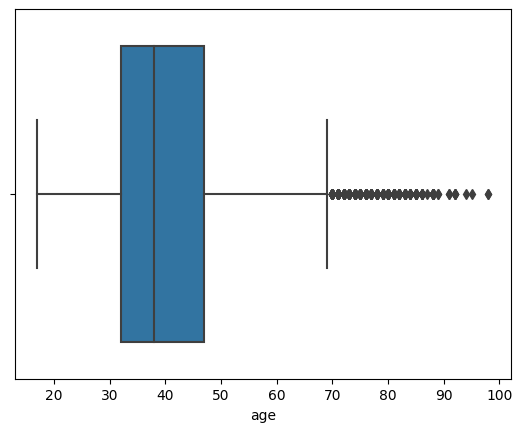

In [131]:
sns.boxplot(x=df_model["age"])

<Axes: xlabel='Deposit', ylabel='age'>

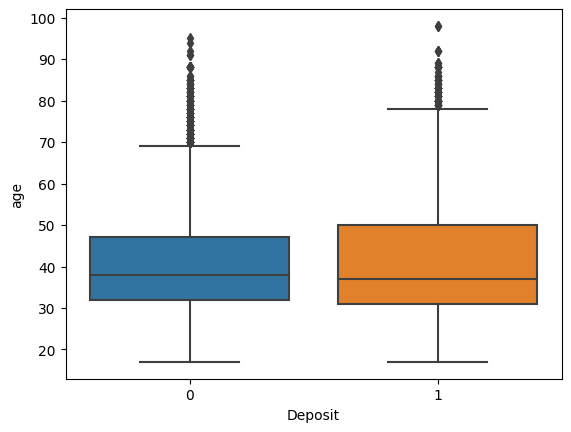

In [132]:
sns.boxplot(data=df_model, y="age", x="Deposit")

In [133]:
# proporsi target untuk data outlier pada kolom age
df_model[df_model['age']>69.5]['Deposit'].value_counts()/len(df_model[df_model['age']>69.5]) * 100

0    52.723312
1    47.276688
Name: Deposit, dtype: float64

Dari informasi diatas terlihat perbandingan nasabah yang berlangganan deposito dan tidak deposito pada outlier kolom `age`. Di putuskan untuk tidak menghapus outlier karena data outlier memiliki informasi penting. Hal ini diperkuat dengan tidak ada batasan usia ketika orang akan berlangganan deposito. Karena deposito di hari tua juga sangat mungkin dan deposito tersebut dapat di wariskan nantinya. [Link](https://www.cnbcindonesia.com/mymoney/20230820192755-72-464463/udah-tahu-belum-6-aset-ini-bisa-diwariskan-secara-gratis#:~:text=Tabungan%20dan%20Deposito,berbeda%2Dbeda%20untuk%20setiap%20bank)

#### **Proporsi data pada kolom campaign**

<Axes: xlabel='campaign'>

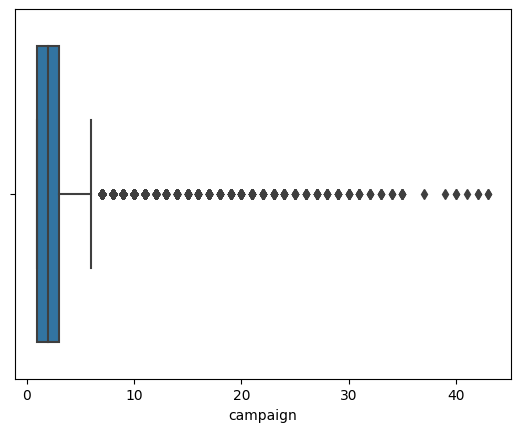

In [134]:
sns.boxplot(x=df_model["campaign"])

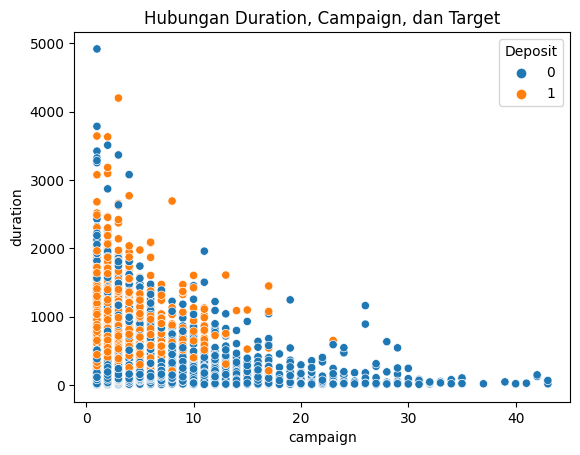

In [135]:
plt.title('Hubungan Duration, Campaign, dan Target')
sns.scatterplot(data=df_model, x = 'campaign', y = 'duration', hue='Deposit')
plt.show()

In [136]:
# proporsi target untuk data outlier pada kolom campaign
df_model[df_model['campaign']>6]['Deposit'].value_counts()/len(df_model[df_model['campaign']>6]) * 100

0    95.331906
1     4.668094
Name: Deposit, dtype: float64

In [137]:
# Cek campaign > 20
data_model[data_model['campaign'] > 20].count()['campaign']

157

In [138]:
# Melakukan filtering pada data
data_model = data_model[(data_model['campaign'] < 20)]

Dari informasi diatas dapat dilihat bahwa setelah 20 kali melakukan kontak, hanya 1 nasabah yang akhirnya melakukan deposit. Dari sini nilai outlier pada kolom `campaign` yang nilainya lebih besar dari 20 akan dihapuskan.

#### **Proporsi data pada kolom pdays**

<Axes: xlabel='pdays'>

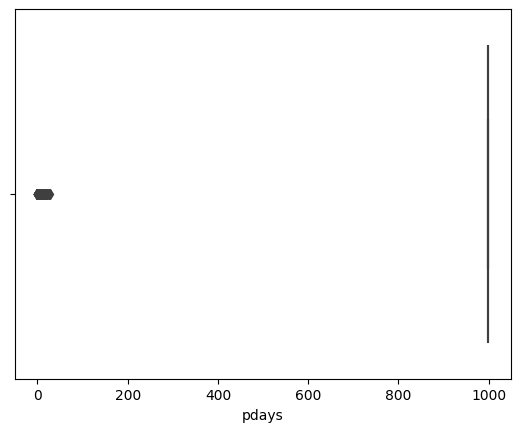

In [139]:
sns.boxplot(x=df_model["pdays"])

In [140]:
# proporsi target untuk data outlier pada kolom pdays
df_model[df_model['pdays']<999]['Deposit'].value_counts()/len(df_model[df_model['pdays']<999]) * 100

1    63.617886
0    36.382114
Name: Deposit, dtype: float64

Pada kolom `pdays` diputuskan untuk tidak menghapus outlier karena data outlier memiliki informasi penting. Hal ini terjadi karena pada boxplot, lower dan upper berada di angka 999, dimana nilai 999 adalah nasabah yang tidak pernah dihubungi sebelumnya, yang artinya 90% customer pada dataset tidak mengikuti promo sebelumnya, sehingga tentu saja customer yang merupakan outlier merupakan customer yang mengikuti promo sebelumnya yang dimana informasi itu sangat penting       

#### **Proporsi data pada kolom previous**

<Axes: xlabel='previous'>

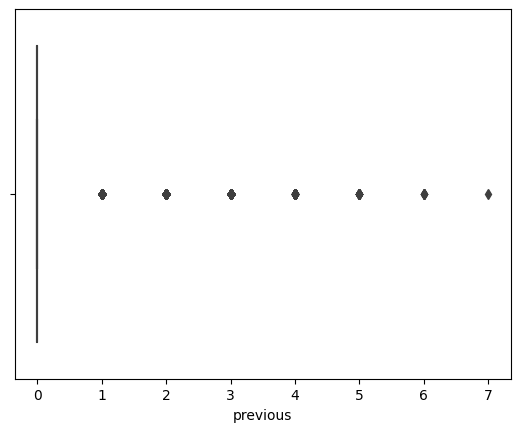

In [141]:
sns.boxplot(x=df_model["previous"])

In [142]:
# proporsi target untuk data outlier pada kolom previous
df_model[df_model['previous']>0]['Deposit'].value_counts()/len(df_model[df_model['previous']>0]) * 100

0    73.45408
1    26.54592
Name: Deposit, dtype: float64

Dari informasi diatas diputuskan untuk tidak menghapus outlier karena data outlier memiliki informasi penting. Hal ini juga terjadi karena pada boxplot, lower dan upper berada di angka 0 yang artinya 85% customer pada dataset tidak mengikuti promo sebelumnya, sehingga tentu saja customer yang merupakan outlier merupakan customer yang mengikuti promo sebelumnya yang dimana informasi itu sangat penting

#### **Proporsi data pada kolom cons.conf.idx**

<Axes: xlabel='cons.conf.idx'>

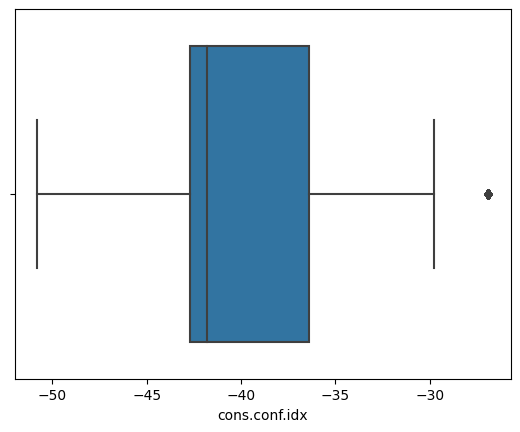

In [143]:
sns.boxplot(x=df_model["cons.conf.idx"])

<Axes: xlabel='Deposit', ylabel='cons.conf.idx'>

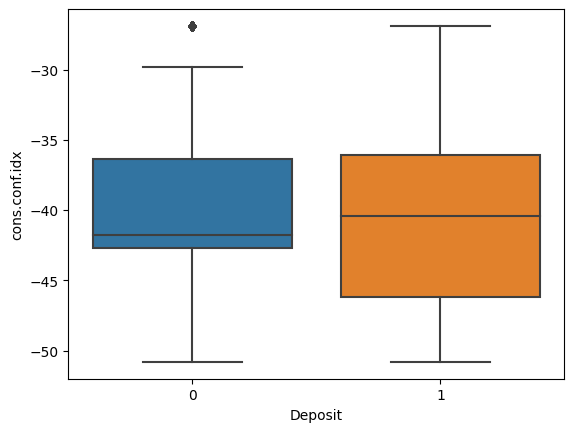

In [144]:
sns.boxplot(data=df_model, y="cons.conf.idx", x="Deposit")

In [145]:
# proporsi target untuk data outlier pada kolom cons.conf.idx
df_model[df_model['cons.conf.idx']>-26.95]['Deposit'].value_counts()/len(df_model[df_model['cons.conf.idx']>-26.95]) * 100

0    59.722222
1    40.277778
Name: Deposit, dtype: float64

Dari informasi diatas terlihat perbandingan nasabah yang berlangganan deposito dan tidak deposito pada outlier kolom `cons.conf.idx`. Karena proporsi pada outlier tidak jauh berbeda dibandingkan dengan proporsi dataset awal, hal ini berarti outlier tersebut memiliki informasi penting sehingga diputuskan untuk `tidak menghapus outlier` manapun dengan harapan memiliki performa model yang baik.

# **Bedaaa**

### **Data Wrangling**

**Missing Value**, .....

Deteksi dan kuantifikasi missing value:

In [146]:
pd.DataFrame({'null': [data_model[col].isna().sum() for col in data_model.columns]}, index=data.columns.values)

,null
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


<Axes: >

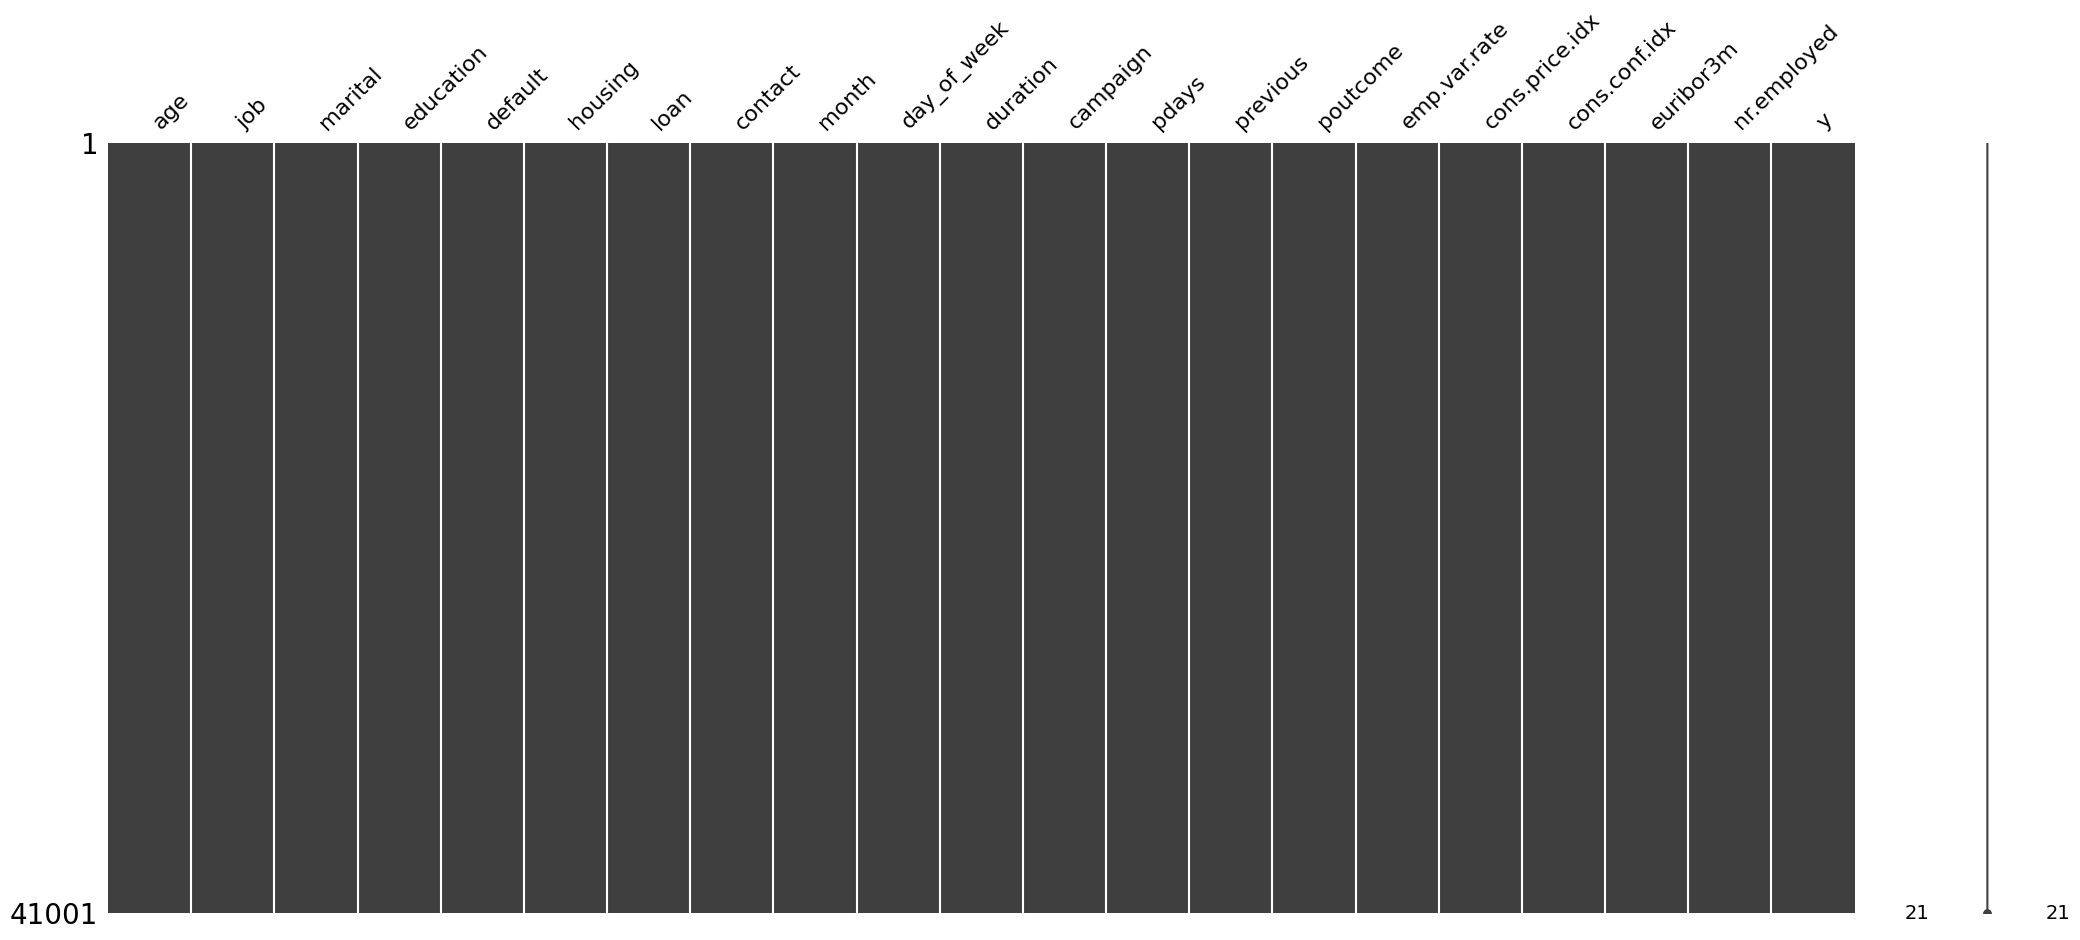

In [147]:
msno.matrix(data_model)

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data:

In [148]:
print(f"Jumlah duplikasi data: {data_model[data_model.duplicated()].shape}")

Jumlah duplikasi data: (12, 21)


In [149]:
data_model = data_model.drop_duplicates(keep='last', ignore_index=True)

**Outlier,** .....

Deteksi dan kuantifikasi outlier:

In [150]:
num_features=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

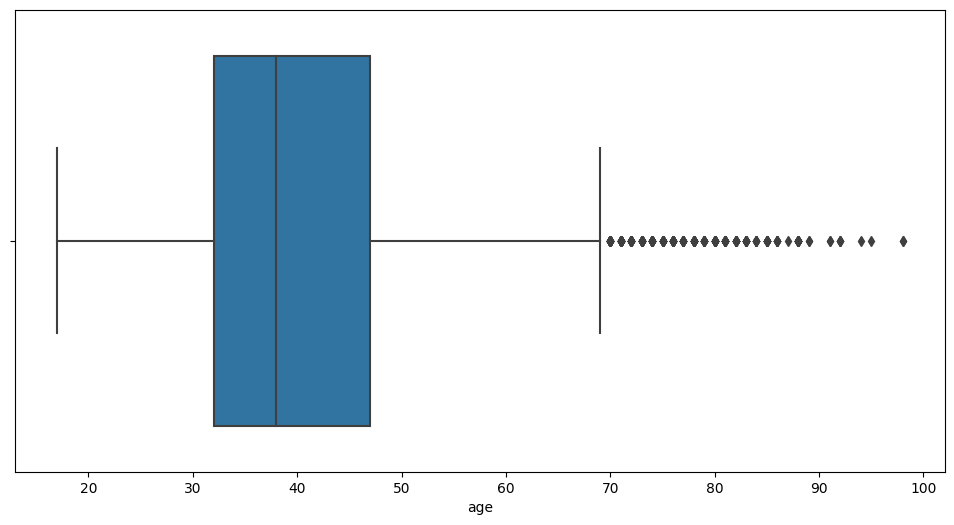

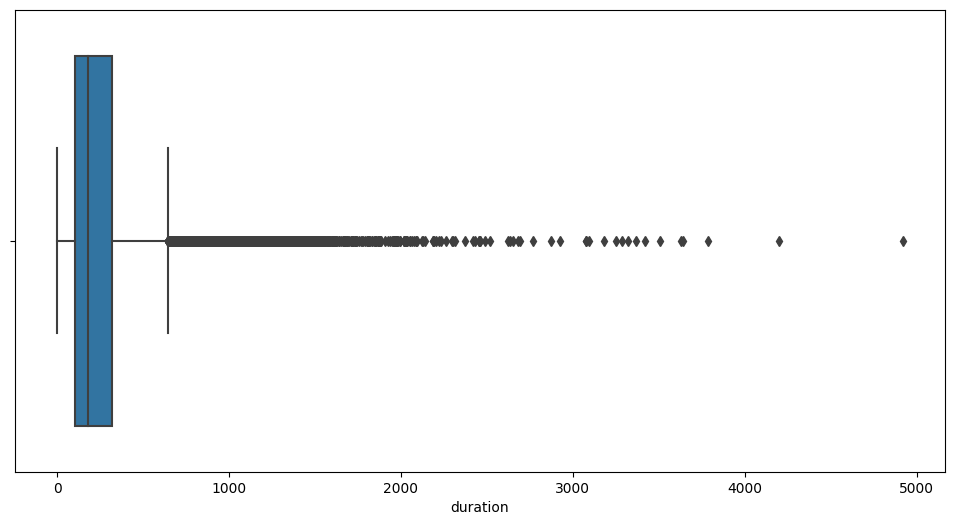

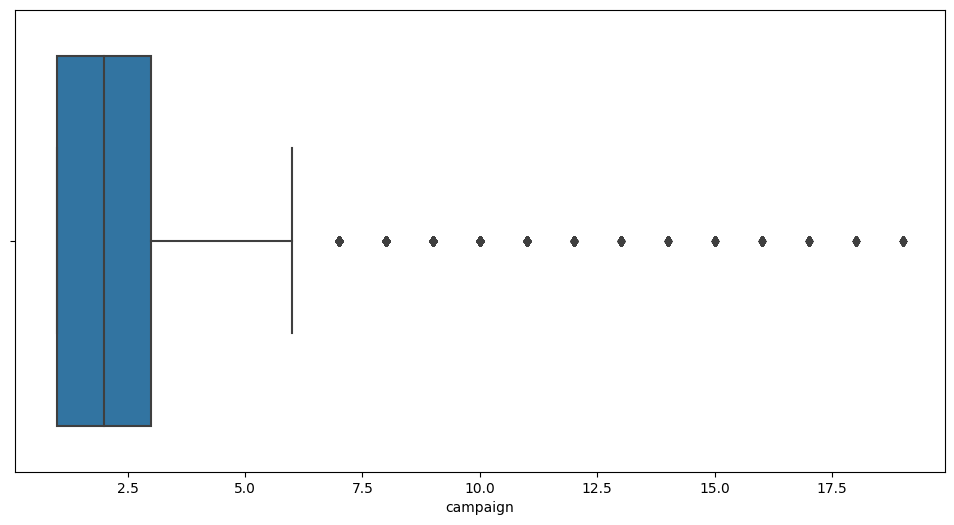

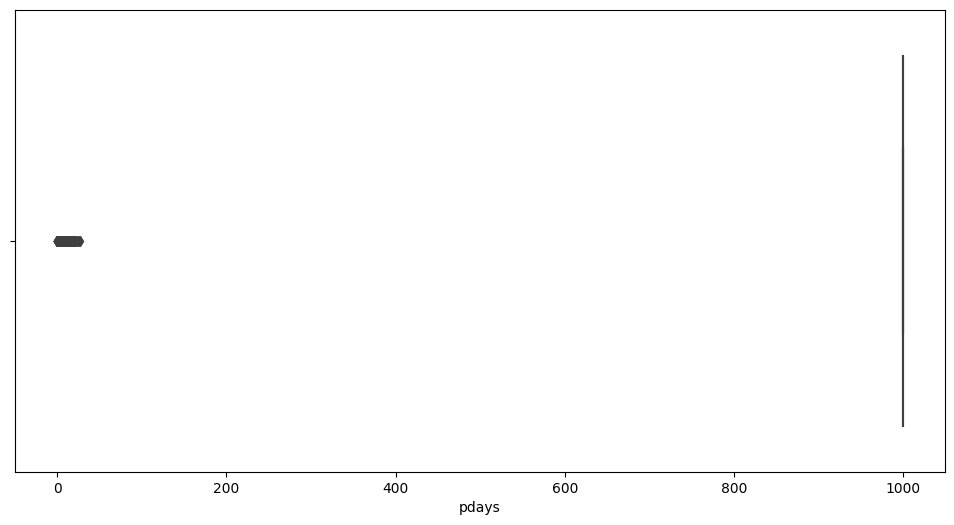

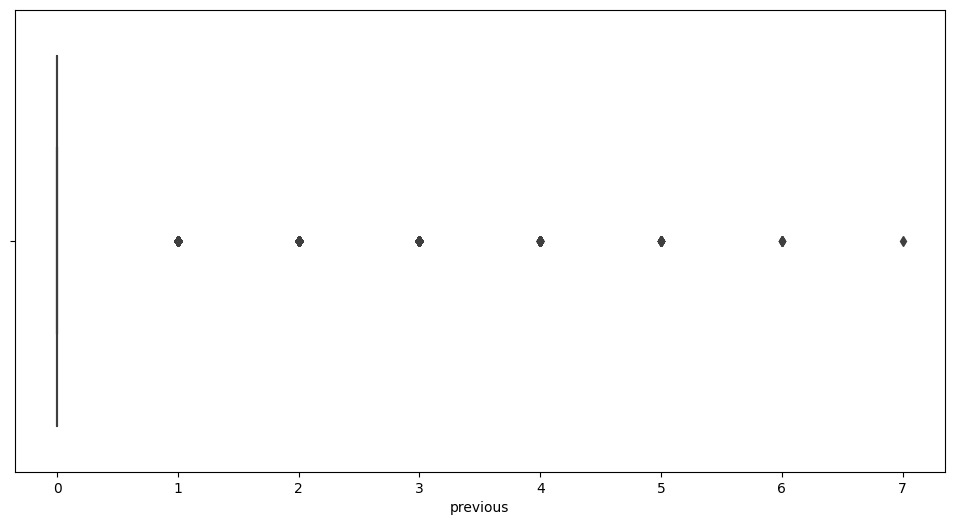

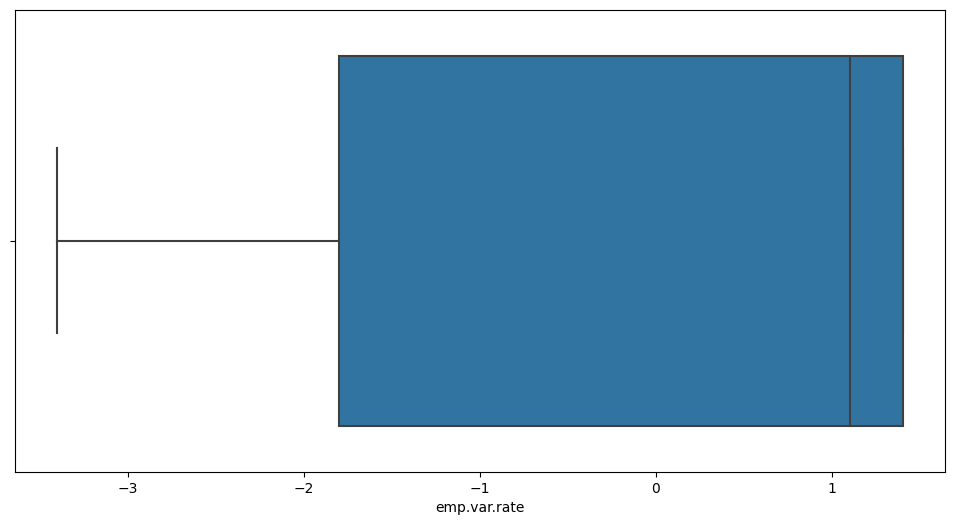

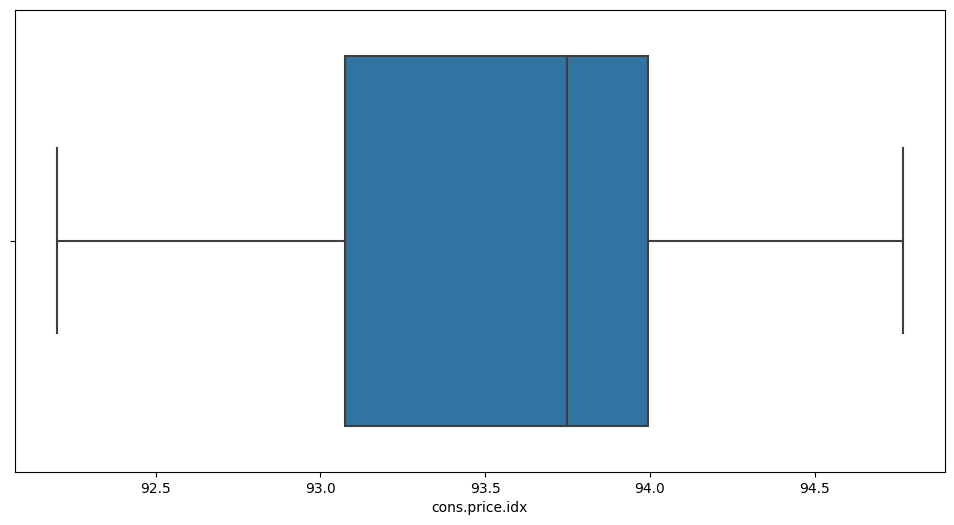

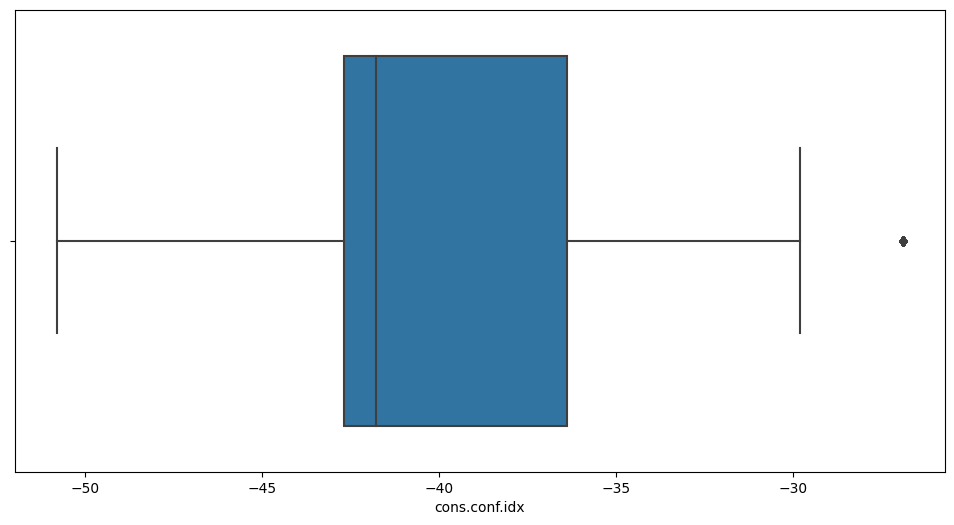

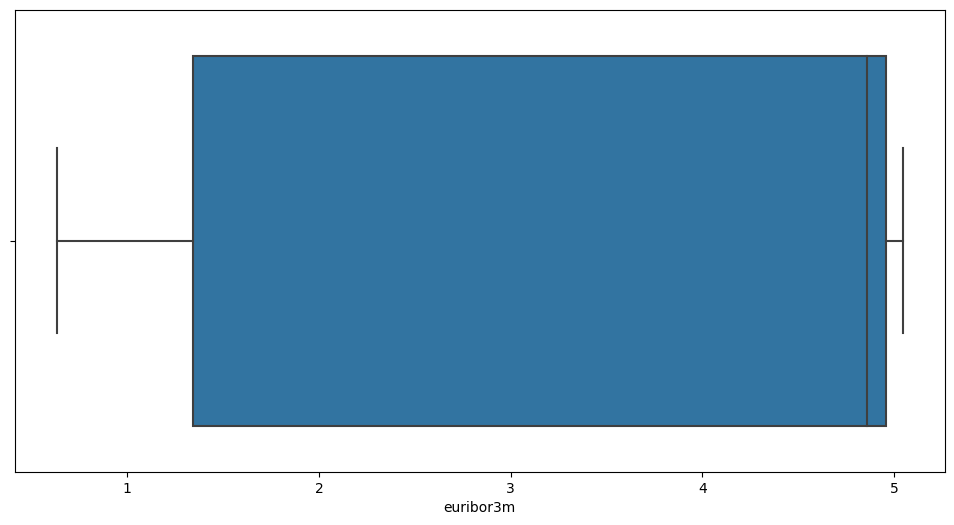

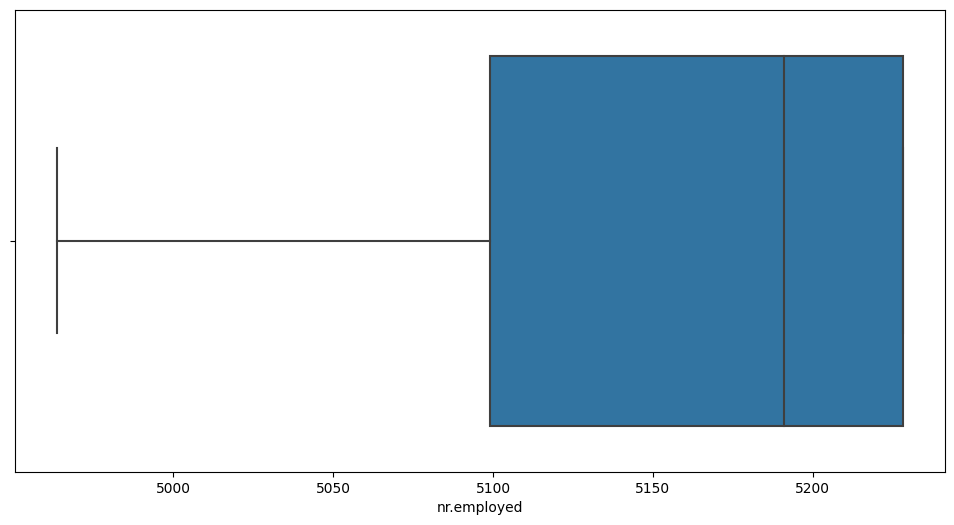

In [151]:
for i in num_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=data_model,ax=ax)

In [152]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data_model):
    q1 = data_model.quantile(0.25)
    q3 = data_model.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    lower = q1 - iqr*1.5
    upper = q3 + iqr*1.5
    print(f'IQR: {iqr}')

    n = len(data_model)
    n_upper = len(np.where(data_model > upper)[0])/n
    n_lower = len(np.where(data_model < lower)[0])/n

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')
    print(f'Persentase: {round((n_upper + n_lower)*100, 2)}')

age

In [153]:
# Outliers pada fitur age
find_anomalies(data_model['age'])

IQR: 15.0
limit_bawah: 9.5
limit_atas: 69.5
Persentase: 1.14


In [154]:
# Cek deskriptif statistik kolom age
data_model['age'].describe()

count    40989.000000
mean        40.020688
std         10.423997
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [155]:
# Cek age > 69.5
data_model[data_model['age'] > 69.5].count()['age']

468

__Insight :__ 
Terlihat bahwa 75% data pada kolom age berjumlah kurang dari 47, sedangkan jumlah maksimalnya adalah 98. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 468 data yang jumlahnya lebih besar dari 69.5 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki jumlah lebih besar dari  69.5 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

Text(0.5, 0, 'Range Selected age')

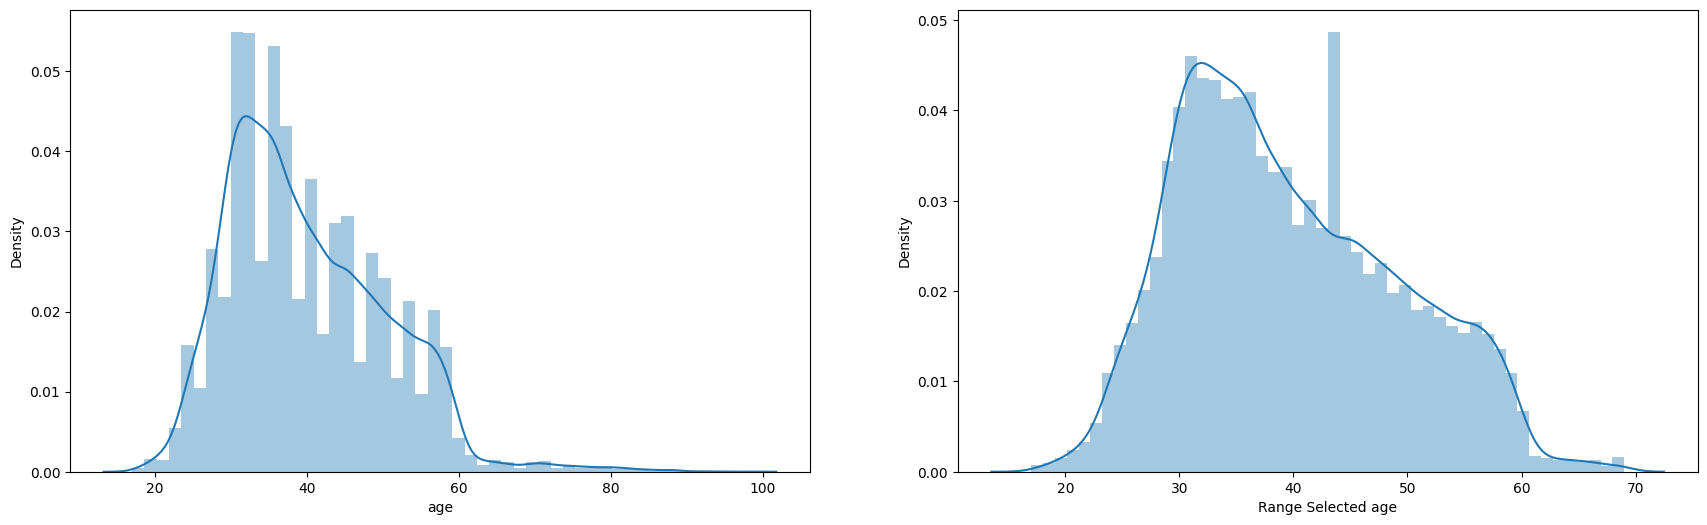

In [156]:
# Melakukan filtering pada data
data_model = data_model[(data_model['age'] <= 69.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data['age'], ax=axes[0])
sns.distplot(data_model['age'], ax=axes[1])
axes[0].set_xlabel('age')
axes[1].set_xlabel('Range Selected age')

duration

In [157]:
# Outliers pada fitur duration
find_anomalies(data_model['duration'])

IQR: 217.0
limit_bawah: -222.5
limit_atas: 645.5
Persentase: 7.22


In [158]:
# Cek deskriptif statistik kolom duration
data_model['duration'].describe()

count    40521.000000
mean       258.891044
std        259.751407
min          0.000000
25%        103.000000
50%        180.000000
75%        320.000000
max       4918.000000
Name: duration, dtype: float64

In [159]:
# Cek duration > 644.5
data_model[data_model['duration'] > 644.5].count()['duration']

2932

__Insight :__ 
Terlihat bahwa 75% data pada kolom age berjumlah kurang dari 319, sedangkan jumlah maksimalnya adalah 4918. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 2935 data yang jumlahnya lebih besar dari 644.5 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki jumlah lebih besar dari  644.5 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun. 

Text(0.5, 0, 'Range Selected duration')

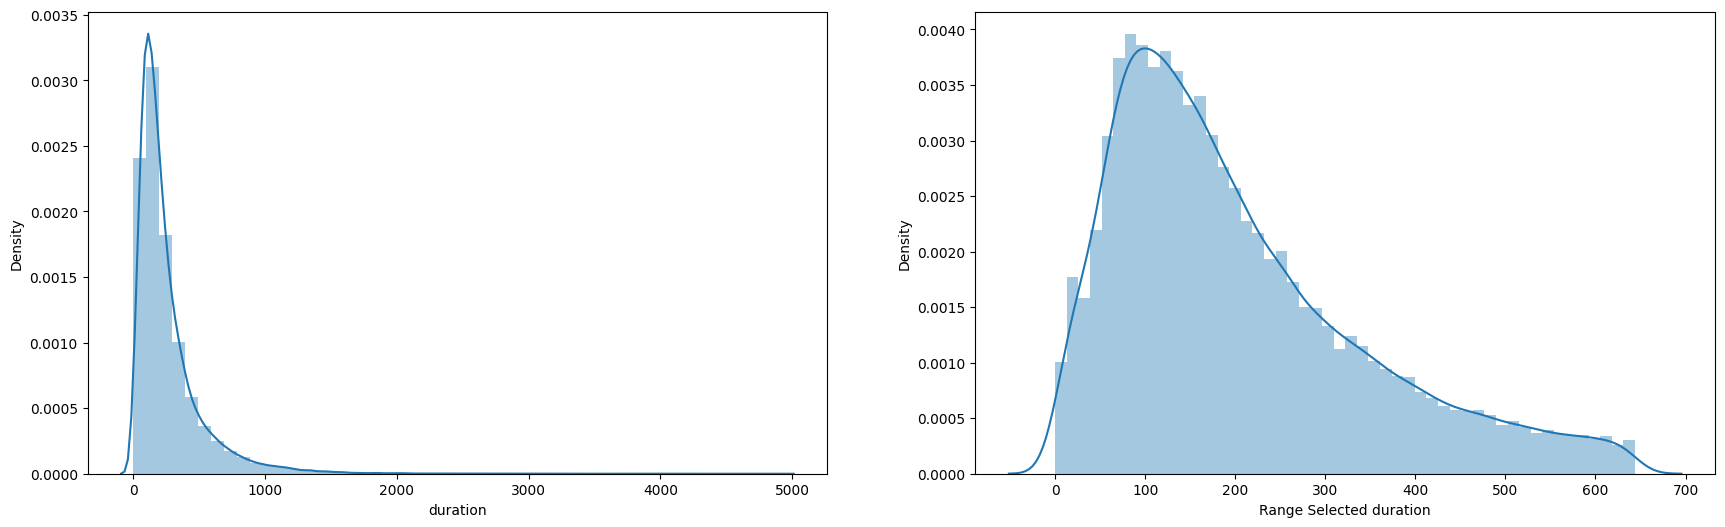

In [160]:
# Melakukan filtering pada data
data_model = data_model[(data_model['duration'] <= 644.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data['duration'], ax=axes[0])
sns.distplot(data_model['duration'], ax=axes[1])
axes[0].set_xlabel('duration')
axes[1].set_xlabel('Range Selected duration')

campaign

In [161]:
# Outliers pada fitur campaign
find_anomalies(data_model['campaign'])

IQR: 2.0
limit_bawah: -2.0
limit_atas: 6.0
Persentase: 5.49


In [162]:
# Cek deskriptif statistik kolom campaign
data_model['campaign'].describe()

count    37589.000000
mean         2.469818
std          2.276740
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: campaign, dtype: float64

In [163]:
# Cek campaign > 6
data_model[data_model['campaign'] > 6].count()['campaign']

2065

__Insight :__ 
Terlihat bahwa 75% data pada kolom age berjumlah kurang dari 3, sedangkan jumlah maksimalnya adalah 56. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 2249 data yang jumlahnya lebih besar dari 6 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki jumlah lebih besar dari  6 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

Text(0.5, 0, 'Range Selected campaign')

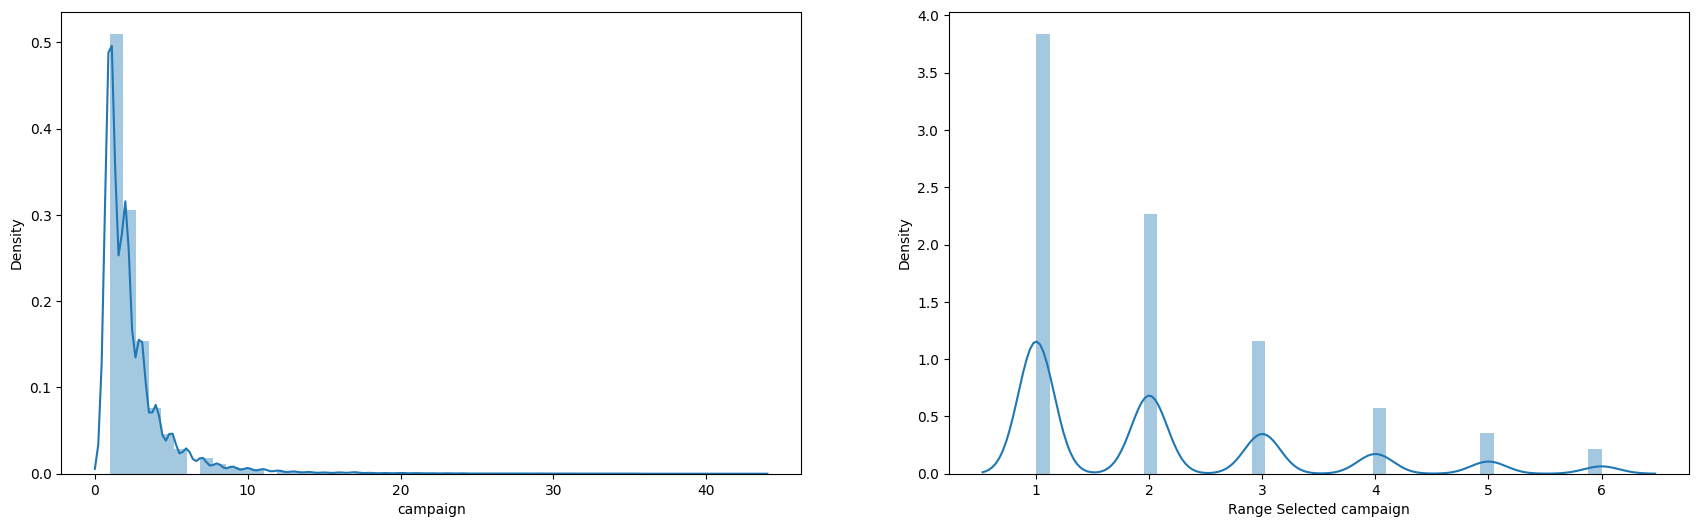

In [164]:
# Melakukan filtering pada data
data_model = data_model[(data_model['campaign'] <= 6)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data['campaign'], ax=axes[0])
sns.distplot(data_model['campaign'], ax=axes[1])
axes[0].set_xlabel('campaign')
axes[1].set_xlabel('Range Selected campaign')

pdays

In [165]:
# Outliers pada fitur pdays
find_anomalies(data_model['pdays'])

IQR: 0.0
limit_bawah: 999.0
limit_atas: 999.0
Persentase: 3.57


In [166]:
# Cek deskriptif statistik kolom pdays
data_model['pdays'].describe()

count    35524.000000
mean       963.555653
std        184.232052
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

previous

In [167]:
# Outliers pada fitur previous
find_anomalies(data_model['previous'])

IQR: 0.0
limit_bawah: 0.0
limit_atas: 0.0
Persentase: 13.97


In [168]:
# Cek deskriptif statistik kolom previous
data_model['previous'].describe()

count    35524.000000
mean         0.175008
std          0.493375
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

emp.var.rate

In [169]:
# Outliers pada fitur emp.var.rate
find_anomalies(data_model['emp.var.rate'])

IQR: 3.2
limit_bawah: -6.6000000000000005
limit_atas: 6.200000000000001
Persentase: 0.0


In [170]:
# Cek deskriptif statistik kolom emp.var.rate
data_model['emp.var.rate'].describe()

count    35524.000000
mean         0.064948
std          1.567057
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

cons.price.idx

In [171]:
# Outliers pada fitur cons.price.idx
find_anomalies(data_model['cons.price.idx'])

IQR: 0.9189999999999969
limit_bawah: 91.69650000000001
limit_atas: 95.3725
Persentase: 0.0


In [172]:
# Cek deskriptif statistik kolom cons.price.idx
data_model['cons.price.idx'].describe()

count    35524.000000
mean        93.566412
std          0.577002
min         92.201000
25%         93.075000
50%         93.444000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

cons.conf.idx

In [173]:
# Outliers pada fitur cons.conf.idx
find_anomalies(data_model['cons.conf.idx'])

IQR: 6.300000000000004
limit_bawah: -52.150000000000006
limit_atas: -26.949999999999992
Persentase: 1.01


In [174]:
# Cek deskriptif statistik kolom cons.conf.idx
data_model['cons.conf.idx'].describe()

count    35524.000000
mean       -40.523094
std          4.623744
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [175]:
# Cek cons.conf.idx > -26.949999999999992
data_model[data_model['cons.conf.idx'] > -26.949999999999992].count()['cons.conf.idx']

359

__Insight :__ 
Terlihat bahwa 75% data pada kolom age berjumlah kurang dari -36.4, sedangkan jumlah maksimalnya adalah -26.9. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 359 data yang jumlahnya lebih besar dari -26.9 (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki jumlah lebih besar dari  -26.9 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

Text(0.5, 0, 'Range Selected cons.conf.idx')

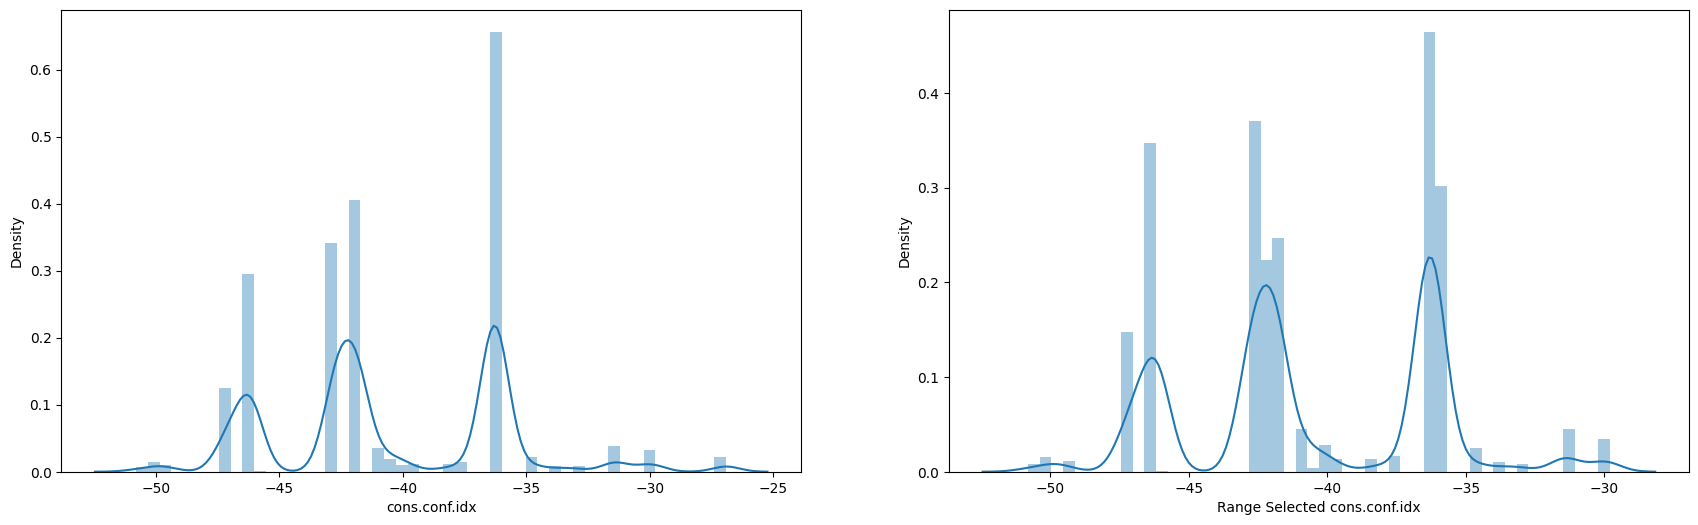

In [176]:
# Melakukan filtering pada data
data_model = data_model[(data_model['cons.conf.idx'] <= -26.949999999999992)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data['cons.conf.idx'], ax=axes[0])
sns.distplot(data_model['cons.conf.idx'], ax=axes[1])
axes[0].set_xlabel('cons.conf.idx')
axes[1].set_xlabel('Range Selected cons.conf.idx')

euribor3m

In [177]:
# Outliers pada fitur euribor3m
find_anomalies(data_model['euribor3m'])

IQR: 3.607
limit_bawah: -4.056500000000001
limit_atas: 10.371500000000001
Persentase: 0.0


In [178]:
# Cek deskriptif statistik kolom euribor3m
data_model['euribor3m'].describe()

count    35165.000000
mean         3.638529
std          1.715600
min          0.634000
25%          1.354000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [179]:
# Cek euribor3m > 10.371500000000001
data_model[data_model['euribor3m'] > 10.371500000000001].count()['euribor3m']

0

In [180]:
# Cek euribor3m < -4.056500000000001
data_model[data_model['euribor3m'] < -4.056500000000001].count()['euribor3m']

0

nr.employed

In [181]:
# Outliers pada fitur nr.employed
find_anomalies(data_model['nr.employed'])

IQR: 129.0
limit_bawah: 4905.6
limit_atas: 5421.6
Persentase: 0.0


In [182]:
# Cek deskriptif statistik kolom nr.employe
data_model['nr.employed'].describe()

count    35165.000000
mean      5168.214341
std         70.243955
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [183]:
# Cek nr.employed > 5421.6
data_model[data_model['nr.employed'] > 5421.6].count()['nr.employed']

0

In [184]:
# Cek nr.employed < 4905.6
data_model[data_model['nr.employed'] < 4905.6].count()['nr.employed']

0